<a href="https://colab.research.google.com/github/vishnu-096/Time-variant-Multi-Objective-Particle-Swarm-Optimization/blob/main/TV_MOPSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def f1(x):
  return np.square(x)

def f2(x):
  return np.square(x-2)

In [ ]:
def get_nonDominated(prevSet,newPop):
  pop = prevSet
  if newPop is not None:
    pop = np.concatenate((prevSet, newPop),axis=1)

  pop = np.unique(pop)
  pop = np.array([pop])
  n = pop.shape[1]
  l = []
  for i in range(n):

    for j in range(n):
      if i != j:
        if f1(pop[0,i]) >= f1(pop[0,j]) and f2(pop[0,i]) >= f2(pop[0,j]):
          break
        elif j == n-1:
          l.append(pop[0,i])
  return np.array([l]) 

In [ ]:
def get_gbest(pop):
  return np.random.choice(pop[0,:], size=1)

In [ ]:
def truncate_nonDominated(pop,n):
  return np.random.choice(pop[0,:], size=(1,n))

In [ ]:
def create_random_particles(number_of_particles, seed_value, x_low_lim, x_high_lim):
  #np.random.seed(seed_value)
  #X = np.random.rand(1, number_of_particles) * 5
  #V = np.random.randn(1, number_of_particles) * 0.1
  X = np.random.uniform(-2,5,[1,number_of_particles])
  V = np.random.randn(1, number_of_particles) * 0.1
  return X,V

In [ ]:
def MOPSO(N,time,c1,c2,w):
  # Initialize particle variables

  x, v = create_random_particles(N,1,-10,10);
  print('Initital Population X',x)
  p_best = x

  nonDominated = get_nonDominated(p_best, None)

  g_best = get_gbest(nonDominated)

  for t in range(time):
    #print(t)
    for i in range(N):
      r1, r2 = np.random.rand(2)
      # update position & velocity
      v[:,i] = w*v[:,i] + c1*r1*(p_best[:,i] - x[:,i]) + c2*r2*(g_best- x[:,i])
      x[:,i] += v[:,i]
      # update pbest 
      if f1(x[:,i]) < f1(p_best[:,i]) and f2(x[:,i]) < f2(p_best[:,i]):
        p_best[:,i] = x[:,i]

    nonDominated = get_nonDominated(nonDominated, p_best)
    if nonDominated.shape[1] > 50:
      nonDominated = truncate_nonDominated(nonDominated, 50)
    g_best = get_gbest(nonDominated)

  return nonDominated,x

In [ ]:
def TV_MOPSO(N,maxT,c1f,c1i,c2f,c2i,w1,w2):
  # Initialize particle variables

  x, v = create_random_particles(N,1,-10,10);
  print('Initital Population X',x)
  p_best = x

  nonDominated = get_nonDominated(p_best, None)

  g_best = get_gbest(nonDominated)

  for t in range(maxT):
    #print(t)
    for i in range(N):
      #adjust parameters
      r1, r2 = np.random.rand(2)
      wt = (w1-w2) * (maxT-t)/maxT + w2
      c1t = (c1f-c1i) * t/maxT + c1i
      c2t = (c2f-c2i) * t/maxT + c2i

      # update position & velocity
      v[:,i] = wt*v[:,i] + c1t*r1*(p_best[:,i] - x[:,i]) + c2t*r2*(g_best- x[:,i])
      x[:,i] += v[:,i]
      # update pbest 
      if f1(x[:,i]) < f1(p_best[:,i]) and f2(x[:,i]) < f2(p_best[:,i]):
        p_best[:,i] = x[:,i]

    nonDominated = get_nonDominated(nonDominated, p_best)
    if nonDominated.shape[1] > 50:
      nonDominated = truncate_nonDominated(nonDominated, 50)
    g_best = get_gbest(nonDominated)

  return nonDominated,x

Initital Population X [[-1.08552965 -1.15214492  1.23448321 -1.87331644  3.10307531  1.0617105
  -0.7514761   2.58603464  4.77390499  0.5340382   2.04139864  0.79358645
   4.11072494  2.26978992  4.5507752   3.44685768  4.16519212  0.95803224
  -1.83253408 -1.41653228 -1.07508679  1.29056409  3.24428504  2.11706542
  -1.88039235  4.36880784  2.14970567  2.6201092  -0.89170745 -1.43638302
  -0.08666777  0.73947266  1.32729402  4.41445996  4.51804233 -1.44713541
   4.69626047  3.43464804 -0.91557391  0.92671492  4.26834788 -1.26061555
   4.72799055  4.38639217  1.8375415   4.56540007  0.86276158  1.09137259
   2.56288524  2.57026284]]
frontier [[1.11474178 1.11165567 1.10874505 1.10016786 1.11297918 1.10749895
  1.09207167 1.11844761 1.11647395 1.08567057 1.09469477 1.1071987
  1.10973982 1.10698201 1.09303043 1.10249718 1.10698201 1.10185235
  1.11910944 1.10370453 1.11153541 1.07532728 1.0892803  1.11165567
  1.07532728 1.11153541 1.09018134 1.10973982 1.09139557 1.08946565
  1.0892803

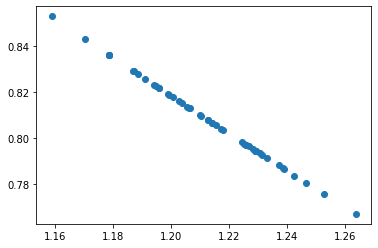

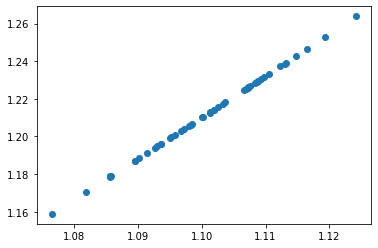

In [ ]:
#Initial MOPSO Parameters
N = 50
t = 50
c1 = c2 = 0.1
w = 0.8

frontier, finalX = MOPSO(N,t,c1,c2,w)
print('frontier', frontier)
print('x', finalX)

plt.figure()
plt.scatter(f1(finalX), f2(finalX))
plt.figure()
plt.scatter(finalX,f1(finalX))

Initital Population X [[-0.02261755  0.48344288  0.64509299  2.16870542 -0.04840665  4.09424186
   0.48752295 -1.34625207  1.08055739  0.44751208  2.36866337 -0.44988193
   3.2174715   1.74027707  0.80775986  0.77314765  2.37480894  0.44644972
  -1.27282949  2.5561621  -1.99238839  3.85598114  4.66662151 -0.22908454
   3.21236065 -1.51265245  3.53009776 -1.91137328 -0.28771741 -1.22915144
   2.36517046  1.97043347 -1.29005747  1.9471858  -1.1219105  -1.99804462
  -0.12187536 -1.18866309  0.37345828  3.14711102 -0.97519544  0.97334495
   4.56127365  4.58641764 -1.32944303  2.97350577 -0.69628318  0.82872966
   2.24567936 -1.16466625]]
frontier [[1.81699806 1.69626405 1.97013849 1.93782956 1.99766544 1.79878616
  1.99769445 1.72173037 1.72173037 1.37229678 1.78863567 1.3648066
  1.69498042 1.81830018 1.69626405 1.84084083 1.98769812 1.8849605
  1.79023995 1.84084083 1.72755047 1.29245327 1.37586851 1.87413762
  1.79878616 1.60910565 1.72641491 1.79507323 1.71707845 1.87413762
  1.7902399

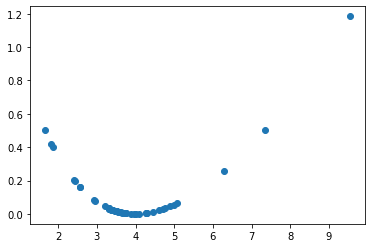

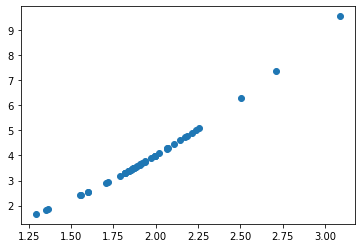

In [ ]:
#Initial TVMOPSO Parameters
N = 50
maxT = 50
c1f = 0.5
c1i = 2.5
c2f = 2.5
c2i = 0.5
w1 = 0.7
w2 = 0.4

frontier, finalX = TV_MOPSO(N,maxT,c1f,c1i,c2f,c2i,w1,w2)
print('frontier', frontier)
print('x', finalX)

plt.figure()
plt.scatter(f1(finalX), f2(finalX))
plt.figure()
plt.scatter(finalX,f1(finalX))

In [ ]:
def PSO(N,r1,r2,c1,c2,w,time):
  # Initialize particle variables
  x, v = create_random_particles(N,1,-5,5);
  fitness_particle = f1(x)
  p_best_x = x
  p_best_val = fitness_particle

  g_best_x = p_best_x[:, p_best_val.argmin()]
  g_best_val = p_best_val.min()

  for t in range(time):
    for i in range(N):
      # update position & velocity
      v[:,i] = w*v[:,i] + c1*r1*(p_best_x[:,i] - x[:,i]) + c2*r2*(g_best_x - x[:,i])
      x[:,i] += v[:,i]
      # update best 
      f = f1(x[:,i])
      if f < p_best_val[:,i]:
        p_best_val[:,i] = f
        p_best_x[:,i] = x[:,i]
    g_best_x = p_best_x[:, p_best_val.argmin()]
    g_best_val = p_best_val.min()
  return g_best_x